# Blackwell Buying Patterns - Full Pipeline - student


* Name: 
* Updated: 2021.07.27


### The objective of this project is to answer the following questions:

#### Task 1 
* 1a) Do customers in different regions spend more per transaction?
* 1b) Which regions spend the most/least? 
* 2)  Is there a relationship between the number of items purchased and amount spent?

#### Task 2
* 3a) Are there differences in the age of customers between regions? 
* 3b) If so, can we predict the age of a customer in a region based on other demographic data?
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store? 
* 4b) Do any other factors predict if a customer will buy online or in our stores?

#### Exercises using digits ds (does not need to be included in the notebook for Task 2): 
* from sklearn import datasets
* show example of data vs target
* dir(digits)    # help on funcs that can be run with digits object
* digits.data
* digits.target

Resource for digits: https://www.c-sharpcorner.com/article/a-complete-scikit-learn-tutorial/


# Import packages

In [2]:
# DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# helpers
%matplotlib inline

# Grahpviz 
from six import StringIO    # previous (7/21) sklearn.externals.six
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus





# Import data

In [3]:
#!pwd
#!ls

In [4]:
data = pd.read_csv('Demographic_Data.csv')
print(data.shape)


(80000, 5)


# Evaluate data

In [5]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [7]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


# Preprocess

### Duplicates

In [8]:
data.duplicated().any()

True

In [9]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(21, 5)


,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [10]:
data = data.drop_duplicates()
data.duplicated().any()

False

### Null values

In [11]:
data.isnull().any()
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

### Discretize

* Discretize amount and age

In [12]:
# Discretize amount - eg., 0-1000, 1001-2000, 2001+
# see pd.qcut() and pd.cut()in the Pandas_Cheat_Sheet reference 
cutoff= [0,1000,2000,3000]
labels=['0-1000', '1001-2000', '2001+']
data['amtBin']= pd.cut(data['amount'], bins=cutoff, labels=labels)
data.head(10)


,in-store,age,items,amount,region,amtBin
0,0,37,4,281.0300,2,0-1000
1,0,35,2,219.5100,2,0-1000
2,1,45,3,1525.7000,4,1001-2000
3,1,46,3,715.2500,3,0-1000
4,1,33,4,1937.5000,1,1001-2000
5,0,24,3,1314.2000,4,1001-2000
6,0,43,6,8.5472,2,0-1000
7,1,66,5,819.9800,3,0-1000
8,1,51,5,908.3100,1,0-1000
9,1,47,3,767.5400,1,0-1000


In [13]:
# Get help for a function
#?pd.qcut 
# or help(pd.qcut)

In [14]:
# Discretize age - eg., 18-33, 34-49, 50-64, 65+
cutoff1= [18,33,49,64,85]
labels1=['18-33', '34-49', '50-64', '65+']
data['ageBin']= pd.cut(data['age'], bins=cutoff1, labels=labels1)
data.head(10)

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.0300,2,0-1000,34-49
1,0,35,2,219.5100,2,0-1000,34-49
2,1,45,3,1525.7000,4,1001-2000,34-49
3,1,46,3,715.2500,3,0-1000,34-49
4,1,33,4,1937.5000,1,1001-2000,18-33
5,0,24,3,1314.2000,4,1001-2000,18-33
6,0,43,6,8.5472,2,0-1000,34-49
7,1,66,5,819.9800,3,0-1000,65+
8,1,51,5,908.3100,1,0-1000,50-64
9,1,47,3,767.5400,1,0-1000,34-49


In [15]:
# add amtBin and ageBin to the dataset

# Analyze Data
### Statistical Analysis

In [16]:
# output statistics
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### Visualizations

In [17]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


#### Histogram

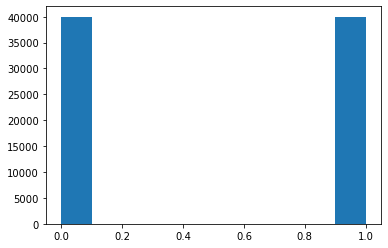

In [18]:
plt.hist(data['in-store'])
plt.show()

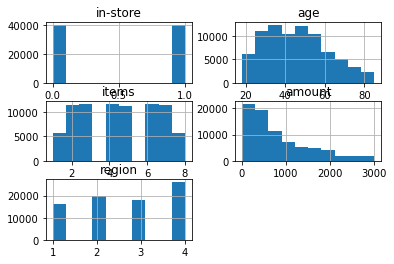

In [19]:
data.hist()
plt.show()

#### Scatter

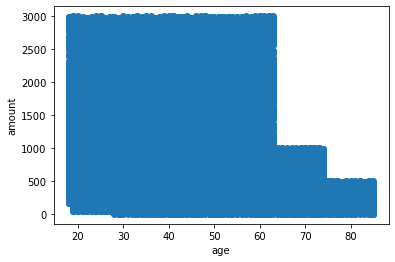

In [20]:
# Scatter plot example
data_sample = data
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
# assignment: add axis titles
plt.ylabel('amount')
plt.xlabel('age')
plt.show()


Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


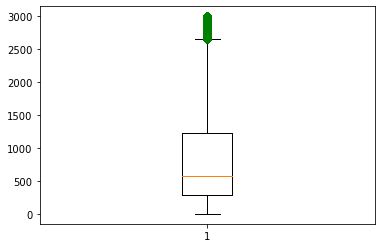

In [21]:
# Box plot example
# eval col names/features
header = data.dtypes.index
print(header)
# plot
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()


#### Stacked Col 
Focus on answering the following business questions:
* 1a) Do customers in different regions spend more per transaction (number of obs per spend category)?
* 1b) Which regions spend the most/least (overall - just from looking at the chart)? 
* 3a) Are there differences in the age of customers between regions?

<AxesSubplot:title={'center':'Bins of amount spend by region'}, xlabel='region'>

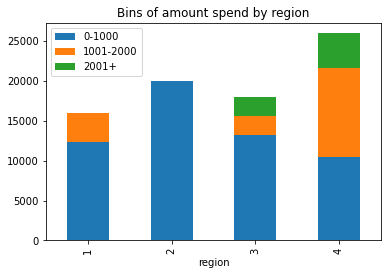

In [22]:
data.groupby('region')['amtBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, title='Bins of amount spend by region')
    

<AxesSubplot:title={'center':'Bins of age by region'}, xlabel='region'>

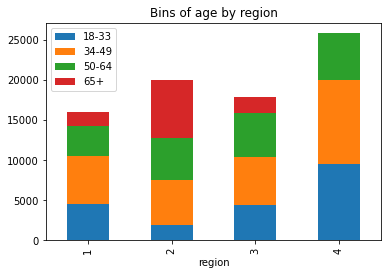

In [23]:
data.groupby('region')['ageBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, title='Bins of age by region')

<AxesSubplot:title={'center':'in-store/online age'}, xlabel='in-store'>

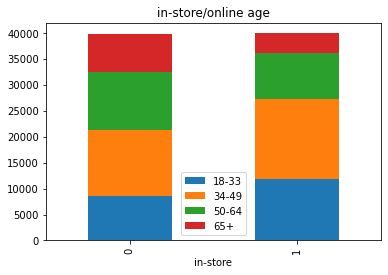

In [24]:
data.groupby('in-store')['ageBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, title='in-store/online age')

# Feature Selection
For this task, you will not be selecting features. Instead, focus on answering the following questions:
* 2) Is there a relationship between the number of items purchased and amount spent?
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store?


### Correlation

In [25]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


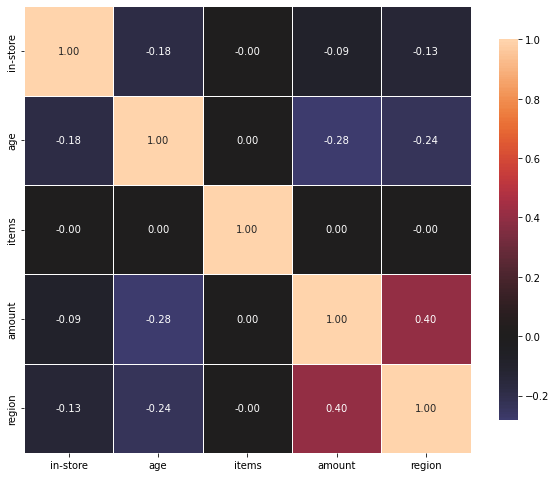

In [26]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Covariance

In [27]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


# Train/Test Sets
* The modeling (predicitive analytics) process begins with splitting data in to train and test sets. 
* Focus on buiding models to answer the following questions:
* 3b) Can we predict the age of a customer in a region based on other demographic data? (Decision tree.)
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store? (In addition to correlation analysis, a decision tree can also provide insight.)
* 4b) Do any other factors predict if a customer will buy online or in our stores? (Decison tree.)


### Set random seed

In [28]:
seed = 123

### Split datasets into X (IVs) and y (DV)
* For each ds, split into X, y
* oob (out-of-box; no feature selection or feature engineering)

In [49]:
# pring column names for quick reference
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')

In [50]:
data['ageBin'] = pd.factorize(data.ageBin)[0]

In [51]:
data['amtBin'] = pd.factorize(data.amtBin)[0]

In [52]:
## For question 3b): set region as dv

Y_oobQ3 = data['region']
# select IVs/features
X_oobQ3 = data[['in-store','age','items','amount']]
# select Age/Amt binned features
X_oobQ3ageAmt = data[['in-store','ageBin','items','amtBin']]


In [53]:
## For questions Q4a/Q4b): set in-store as dv 
Y_oobQ4 = data['in-store']
# select IVs/features
X_oobQ4 = data[['age','items','amount','region']]
# select Age/Amt binned features
X_oobQ4ageAmt = data[['region','ageBin','items','amtBin']]



### Create train and test sets

In [54]:
# Q3b) region as dv; un-binned data

X_trainQ3, X_testQ3, Y_trainQ3, Y_testQ3 = train_test_split(X_oobQ3, 
                                            Y_oobQ3, 
                                            test_size = .30, 
                                            random_state = seed)

print(X_trainQ3.shape, X_testQ3.shape)
print(Y_trainQ3.shape, Y_testQ3.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


In [55]:
# Q4a) in-store as dv

X_trainQ4, X_testQ4, Y_trainQ4, Y_testQ4 = train_test_split(X_oobQ4, 
                                            Y_oobQ4, 
                                            test_size = .30, 
                                            random_state = seed)
print(X_trainQ4.shape, X_testQ4.shape)
print(Y_trainQ4.shape, Y_testQ4.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


In [56]:
# Q4b) in-store as dv; age binned & amount binned

X_trainQ4B, X_testQ4B, Y_trainQ4B, Y_testQ4B = train_test_split(X_oobQ4ageAmt, 
                                            Y_oobQ4, 
                                            test_size = .30, 
                                            random_state = seed)
print(X_trainQ4B.shape, X_testQ4B.shape)
print(Y_trainQ4B.shape, Y_testQ4B.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


# Modeling
#### Two purposes of modeling:
* 1) Evaluate patterns in data
* 2) Make predictions
  

## Evaluate patterns in data using a Decision Tree (DT)

### dv = region


In [57]:
# use the dataset that has region as the dv

# run code to fit and predict the DecisionTreeClassifier


# select DT model for classification
dt = DecisionTreeClassifier(max_depth=3)

# train/fit the mode using region as dv, and binned by age & amt
dtModel3 = dt.fit(X_trainQ3, Y_trainQ3)

# make predicitons with the trained/fit model
dtPred3 = dtModel3.predict(X_testQ3)

# performance metrics
print(accuracy_score(Y_testQ3, dtPred3))
print(classification_report(Y_testQ3, dtPred3))

0.6351171126114862
              precision    recall  f1-score   support

           1       0.41      0.68      0.51      4838
           2       0.90      1.00      0.95      5979
           3       0.54      0.11      0.18      5391
           4       0.65      0.70      0.67      7786

    accuracy                           0.64     23994
   macro avg       0.63      0.62      0.58     23994
weighted avg       0.64      0.64      0.60     23994



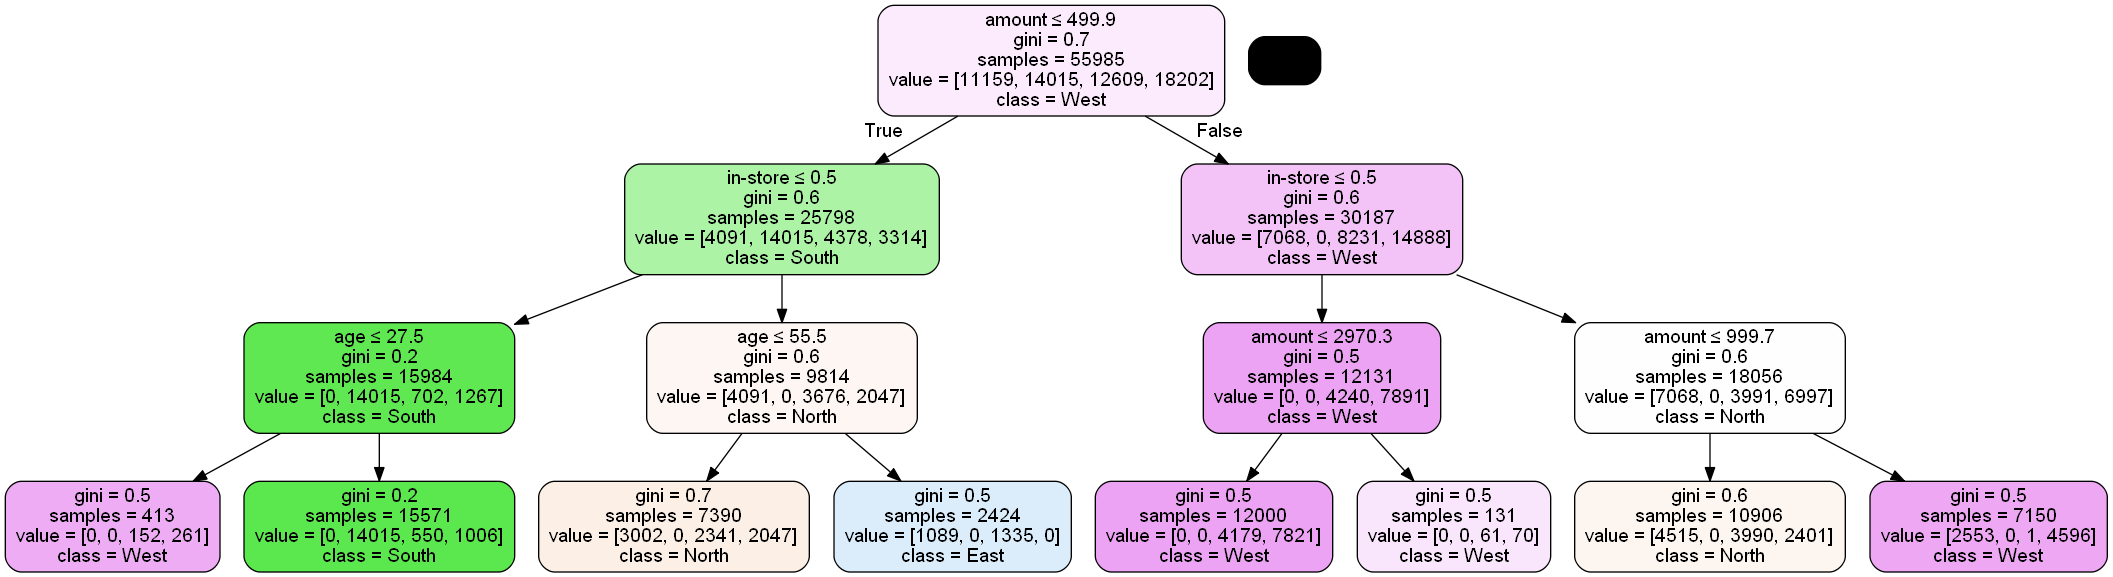

In [58]:
# visualize DT
# this is just a list specifying the region classes
# region_values = ['0','1','2','3'] 
region_values = ['North','South','East','West'] 

dot_data = StringIO()

export_graphviz(dtModel3,
                out_file=dot_data, 
                filled=True, 
                rounded=True,
                feature_names=X_trainQ3.columns, 
                class_names=region_values,
                label='all',
                precision=1,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [59]:
# 3b) Is age in the DT? If so, what decision rules incorporate age? 

# Other questions: From the above DT, is the 'items' feature in the tree? 
# What does it mean if it is, or is not, in the tree?

### dv = in-store


In [60]:
# run DT model
# select DT model for classification
dt = DecisionTreeClassifier(max_depth=3)

# train/fit the mode using in-store as dv
dtModel4 = dt.fit(X_trainQ4, Y_trainQ4)

# make predicitons with the trained/fit model
dtPred4 = dtModel4.predict(X_testQ4)

# performance metrics
print(accuracy_score(Y_testQ4, dtPred4))
print(classification_report(Y_testQ4, dtPred4))

0.8380428440443444
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     11874
           1       0.76      1.00      0.86     12120

    accuracy                           0.84     23994
   macro avg       0.88      0.84      0.83     23994
weighted avg       0.88      0.84      0.83     23994



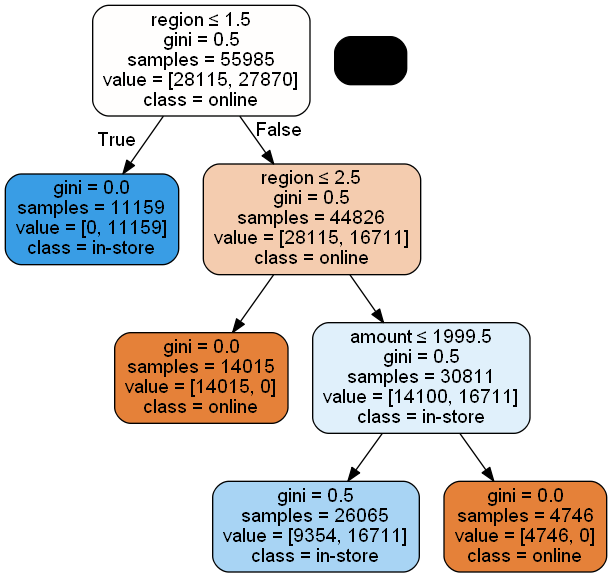

In [61]:
# visualize DT
store_values = ['online','in-store'] 

dot_data = StringIO()

export_graphviz(dtModel4,
                out_file=dot_data, 
                filled=True, 
                rounded=True,
                feature_names=X_trainQ4.columns, 
                class_names=store_values,
                label='all',
                precision=1,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [62]:
# 4b) Do any factors predict if a customer will buy online or
# in our stores?

# Yes, the amount since only customers who spend more than 2,000 buy only online.
# And also the region, as some regions buy only in-store or online. 


## Make Predictions
* Focus on the following question: Can a model be developed that can accurately classify where a transaction took place (in-store/online)?

### Select models

In [63]:
# create empty list and then populate it with the following models

models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# create empty lists to hold results and model names
results = []
names = []


### CV (cross-validation)


In [64]:
# Set in-store as dv; unbinned data

for name, model in models:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,
                             X_trainQ4,
                             Y_trainQ4,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.8463338935624227
RF 0.8622667228352557
GB 0.8862910539963224


In [65]:
# Same as above, but using binned data for age and amount

In [73]:
dt = DecisionTreeClassifier(max_depth=3)

# train/fit the mode using in-store as dv, and binned by age & amt
dtModel4B = dt.fit(X_trainQ4B, Y_trainQ4B)

# make predicitons with the trained/fit model
dtPred4B = dtModel4B.predict(X_testQ4B)

# performance metrics
print(accuracy_score(Y_testQ4B, dtPred4B))
print(classification_report(Y_testQ4B, dtPred4B))

0.8380428440443444
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     11874
           1       0.76      1.00      0.86     12120

    accuracy                           0.84     23994
   macro avg       0.88      0.84      0.83     23994
weighted avg       0.88      0.84      0.83     23994



In [72]:
# Set in-store as dv; binned data

for name, model in models:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,
                             X_trainQ4B,
                             Y_trainQ4B,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.8463338935624227
RF 0.8622667228352557
GB 0.8862910539963224
DT 0.8741091959586083
RF 0.8741091959586083
GB 0.8742342272164226


In [74]:
# Based all of the above model runs, which is the most accurate?
# the most accurate model is Gradient boosting classifier
# Is the accuracy of the top model higher than 75%?
# Yes it is 87%


In [45]:
#?cross_val_score